In [2]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
# Import Dataset
eq_data = pd.read_csv("all_month.csv") #Link does not work when connected to git hub
eq_data.info()
#eq_data['place'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9662 entries, 0 to 9661
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9662 non-null   object 
 1   latitude         9662 non-null   float64
 2   longitude        9662 non-null   float64
 3   depth            9662 non-null   float64
 4   mag              9661 non-null   float64
 5   magType          9661 non-null   object 
 6   nst              7316 non-null   float64
 7   gap              7316 non-null   float64
 8   dmin             5868 non-null   float64
 9   rms              9662 non-null   float64
 10  net              9662 non-null   object 
 11  id               9662 non-null   object 
 12  updated          9662 non-null   object 
 13  place            9662 non-null   object 
 14  type             9662 non-null   object 
 15  horizontalError  6691 non-null   float64
 16  depthError       9661 non-null   float64
 17  magError      

In [ ]:
#Determin how many records
# 9662 rows × 21 columns

In [58]:
#Determin useful headings and drop columns
# useful: Magnitude, place, time

new_eq_data = eq_data.drop(columns=['id','latitude', 'longitude', 'depth', 'magType','nst','gap','dmin','rms','net','updated','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource'])
#new_eq_data = eq_data['time','mag','place'].index()
new_eq_data

,time,mag,place
0,2023-09-24T02:32:24.208Z,1.10,"Kenai Peninsula, Alaska"
1,2023-09-24T02:32:04.780Z,0.65,"10 km WNW of The Geysers, CA"
2,2023-09-24T02:25:52.951Z,1.50,"25 km WNW of Anchor Point, Alaska"
3,2023-09-24T02:22:34.663Z,1.10,"84 km NNW of Karluk, Alaska"
4,2023-09-24T02:07:25.788Z,4.50,"Izu Islands, Japan region"
...,...,...,...
9657,2023-08-25T02:50:33.508Z,2.90,"214 km SE of Atka, Alaska"
9658,2023-08-25T02:50:22.540Z,1.45,"2 km SE of The Geysers, CA"
9659,2023-08-25T02:48:58.180Z,1.59,"2 km ESE of The Geysers, CA"
9660,2023-08-25T02:47:46.690Z,3.00,"3 km SE of The Geysers, CA"


In [8]:
# List Data in order of Magnitude
new_eq_data.sort_values('mag', ascending=False)


,time,mag,place
8164,2023-08-28T19:55:30.869Z,7.10,"178 km NNE of Gili Air, Indonesia"
4121,2023-09-08T22:11:01.432Z,6.80,"Al Haouz, Morocco"
4356,2023-09-08T09:09:58.499Z,6.60,south of the Kermadec Islands
2935,2023-09-12T11:03:18.873Z,6.30,"73 km N of Namuac, Philippines"
1388,2023-09-18T13:21:23.790Z,6.30,"180 km N of Hirara, Japan"
...,...,...,...
3310,2023-09-11T02:52:22.070Z,-0.92,"63 km ENE of Pedro Bay, Alaska"
5402,2023-09-05T11:47:08.960Z,-0.92,"77 km NW of Ninilchik, Alaska"
2861,2023-09-12T19:13:06.610Z,-0.99,"62 km ENE of Pedro Bay, Alaska"
2525,2023-09-14T01:56:42.400Z,-1.02,"62 km ENE of Pedro Bay, Alaska"


In [62]:
new_eq_data['mag'].describe()

count    9661.000000
mean        1.565404
std         1.202643
min        -1.020000
25%         0.770000
50%         1.340000
75%         2.000000
max         7.100000
Name: mag, dtype: float64

In [9]:
# List top 30 places with highest magnitude
new_eq_data.sort_values('mag', ascending=False).head(30)

,time,mag,place
8164,2023-08-28T19:55:30.869Z,7.1,"178 km NNE of Gili Air, Indonesia"
4121,2023-09-08T22:11:01.432Z,6.8,"Al Haouz, Morocco"
4356,2023-09-08T09:09:58.499Z,6.6,south of the Kermadec Islands
2935,2023-09-12T11:03:18.873Z,6.3,"73 km N of Namuac, Philippines"
1388,2023-09-18T13:21:23.790Z,6.3,"180 km N of Hirara, Japan"
4850,2023-09-06T23:48:05.064Z,6.2,"Near the coast of Coquimbo, Chile"
2672,2023-09-13T11:49:15.926Z,6.1,West Chile Rise
6737,2023-09-01T20:49:55.132Z,6.1,"10 km ENE of Severo-Kuril’sk, Russia"
512,2023-09-21T21:11:49.950Z,6.1,"41 km WSW of Sola, Vanuatu"
3204,2023-09-11T12:51:33.129Z,6.0,"39 km NNE of Ternate, Indonesia"


In [ ]:
# List top 30 places with highest magnitude
new_eq_data.sort_values('place', ascending=False).head(30)

In [17]:
# Group dataset by how many places had the same level of magnitude
new_eq_data.groupby(['mag']).count()

,time,place
mag,,
-1.02,1,1
-0.99,1,1
-0.92,2,2
-0.87,1,1
-0.85,1,1
...,...,...
6.20,1,1
6.30,2,2
6.60,1,1


In [73]:
# create a distrubution graph for magnitude
magGraph = new_eq_data['mag'].value_counts().reset_index()
magGraph


,mag,count
0,1.400000,263
1,1.600000,238
2,1.100000,224
3,1.200000,222
4,1.300000,212
...,...,...
537,2.160000,1
538,3.830000,1
539,1.940000,1
540,1.774049,1


Text(0, 0.5, 'Frequency')

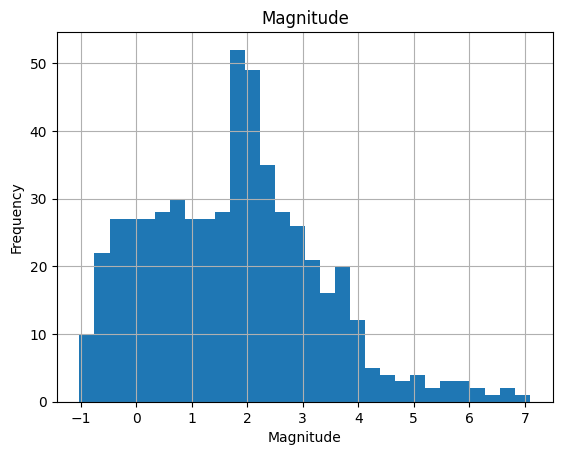

In [74]:
fig, ax = plt.subplots()
magGraph.hist(column='mag', bins =30,ax=ax)
#Not sure what bins means? but it reduces the column width and affects the frequency
ax.set_title('Magnitude')
ax.set_xlabel("Magnitude")
ax.set_ylabel("Frequency")

In [88]:
#Group by place with most Earthquakes
new = new_eq_data.groupby(['place']).count().sort_values('time', ascending=False).drop(columns = 'mag').head(20).reset_index()
#resetting the index is quite important. 
new

,place,time
0,"7 km NW of The Geysers, CA",214
1,Alaska Peninsula,112
2,Southern Alaska,105
3,"7 km SW of Volcano, Hawaii",96
4,"8 km NW of The Geysers, CA",88
5,"85 km NNW of Karluk, Alaska",83
6,"37 km NNE of Amboy, Washington",69
7,Central Alaska,67
8,"Island of Hawaii, Hawaii",63
9,"6 km NW of The Geysers, CA",57


In [78]:
#Prepare data for table - Simpler way of writing the above
graph = new_eq_data['place'].value_counts().reset_index().head(30)
graph



,place,count
0,"7 km NW of The Geysers, CA",214
1,Alaska Peninsula,112
2,Southern Alaska,105
3,"7 km SW of Volcano, Hawaii",96
4,"8 km NW of The Geysers, CA",88
5,"85 km NNW of Karluk, Alaska",83
6,"37 km NNE of Amboy, Washington",69
7,Central Alaska,67
8,"Island of Hawaii, Hawaii",63
9,"6 km NW of The Geysers, CA",57


Text(0, 0.5, 'Frequency')

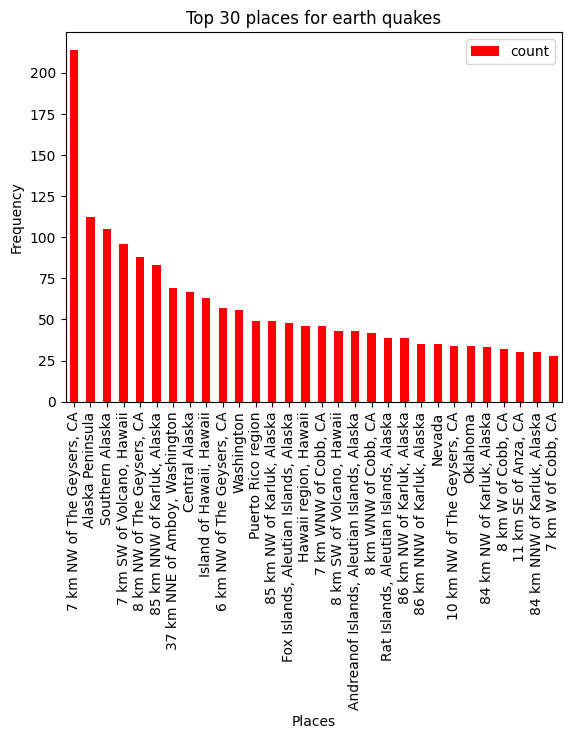

In [83]:
fig, ax = plt.subplots()
graph.plot(kind='bar', x = 'place', y = 'count', color = 'red', ax = ax)


ax.set_title('Top 30 places for earth quakes')
ax.set_xlabel("Places")
ax.set_ylabel("Frequency")


Text(0, 0.5, 'Frequency')

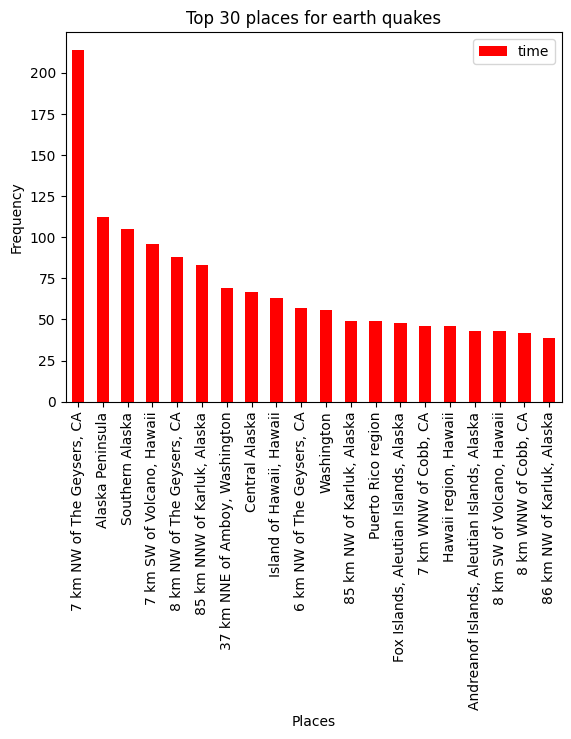

In [89]:
fig, ax = plt.subplots()
new.plot(kind='bar', x = 'place', y = 'time', color = 'red', ax = ax)


ax.set_title('Top 30 places for earth quakes')
ax.set_xlabel("Places")
ax.set_ylabel("Frequency")